In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from IPython.display import clear_output

In [0]:
data = pd.read_csv("sample_data/california_housing_train.csv")

In [0]:
data = data.dropna(axis = 0)

In [0]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0


In [0]:
target_var = data['median_house_value']
features = data.drop(['median_house_value'],axis = 1).copy()

In [0]:
print("Feature Shapes: ",features.shape)
print("Target Shape: ",target_var.shape)

Feature Shapes:  (17000, 8)
Target Shape:  (17000,)


In [0]:
def correlation(x,y):
  return (np.sum((x-np.mean(x))*(y-np.mean(y))))  /  np.sqrt(np.sum((x-np.mean(x))**2) * np.sum((y-np.mean(y))**2))

column_names = data.columns

for i in range(0,len(data.T)):
  print(column_names[i], " Correlation with Target: ", correlation(data.T.iloc[i],data['median_house_value']))  

longitude  Correlation with Target:  -0.04498169651091464
latitude  Correlation with Target:  -0.14491671733762976
housing_median_age  Correlation with Target:  0.10675770707287639
total_rooms  Correlation with Target:  0.13099146625326671
total_bedrooms  Correlation with Target:  0.04578305197954593
population  Correlation with Target:  -0.02785006112089836
households  Correlation with Target:  0.06103063378908089
median_income  Correlation with Target:  0.6918706037806693
median_house_value  Correlation with Target:  1.0


In [0]:
features_s = data[['median_income','total_rooms']]

In [0]:
def curve(m,x,c):
  return m[0]*x.T.iloc[0] + m[1]*(x.T.iloc[1]**2) + c

def error(m,x,c,y):
  return np.mean((curve(m,x,c)-y)**2)

def derivative_slope_x1(m,x,c,y):
  
  return 2 * np.mean((curve(m,x,c)-y)*x.T.iloc[0]**1) 

def derivative_slope_x2(m,x,c,y):
  return 2 * np.mean((curve(m,x,c)-y)*x.T.iloc[1]**2)


def derivative_intercept(m,x,c,y):
  return 2 * np.mean((curve(m,x,c)-y))

def accuracy_func(error_param,y_pinto):
  return 100 - (error_param/np.mean(y_pinto**2))*100
  

In [0]:
print(m)
curve(m,features_s,c)

[nan, nan]


0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
10      NaN
11      NaN
12      NaN
13      NaN
14      NaN
15      NaN
16      NaN
17      NaN
18      NaN
19      NaN
20      NaN
21      NaN
22      NaN
23      NaN
24      NaN
25      NaN
26      NaN
27      NaN
28      NaN
29      NaN
         ..
16970   NaN
16971   NaN
16972   NaN
16973   NaN
16974   NaN
16975   NaN
16976   NaN
16977   NaN
16978   NaN
16979   NaN
16980   NaN
16981   NaN
16982   NaN
16983   NaN
16984   NaN
16985   NaN
16986   NaN
16987   NaN
16988   NaN
16989   NaN
16990   NaN
16991   NaN
16992   NaN
16993   NaN
16994   NaN
16995   NaN
16996   NaN
16997   NaN
16998   NaN
16999   NaN
Length: 17000, dtype: float64

In [0]:
derivative_slope_x1(m,features_s,c,target_var)

nan

<function matplotlib.pyplot.show>

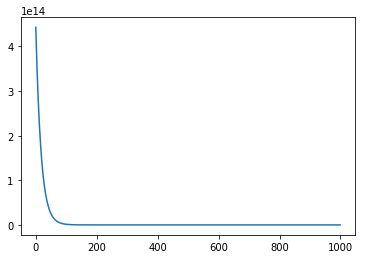

In [0]:
m = [random.random(),random.random()]
c = random.random()

iters = 1000
lr = 0.00000000000000001
cost = []

for i in range(iters):
  m[0] = m[0] - lr*derivative_slope_x1(m,features_s,c,target_var)
  m[1] = m[1] - lr*derivative_slope_x2(m,features_s,c,target_var)
  c    = c - lr*derivative_intercept(m,features_s,c,target_var)

  cost.append(error(m,features_s,c,target_var))
  print(error(m,features_s,c,target_var))
  clear_output(True)
  
plt.plot(cost)
plt.show
  
 